A common problem across businesses in many industries is that of customer churn. Businesses often have to invest substantial amounts attracting new clients, so every time a client leaves it represents a significant investment lost. Both time and effort then need to be channelled into replacing them. Being able to predict when a client is likely to leave and offer them incentives to stay can offer huge savings to a business. <br/>
In this project am going to analyse Telco customer churn dataset from IBM to predict users who are likely to churn so that the company can prevent them from doing so with offers/incentives. 

Project is divided into:<br/>
Initial Analysis of dataset<br/>
Exploratory Analysis<br/>
Data Cleaning<br/>
Feature Engineering<br/>
Model Training and Model Selection<br/>
Metrics Evaluation<br/>
Probability Estimation<br/>
Results<br/><br/>

We will identify the most important features and the features which have high influence on customers.Finally we will find the customers who have highest chance of leaving the company.


In [114]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [115]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,roc_auc_score, f1_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [116]:
telco_data=pd.read_csv('~/WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=' ')

In [117]:
#Preview data
telco_data.head()
telco_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [118]:
#Make a backup copy
telco_copy = telco_data.copy()

Analyze by describing data

In [119]:
#Which features are available in the dataset?
print(telco_data.columns.values)

#Dimension of dataset
telco_data.shape

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


(7043, 21)

In [120]:
#View the datatypes:
telco_data.dtypes
telco_data.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Data cleaning

In this step we are going to: <br/>
Replace or remove missng values <br/>
Check the datatype of each column and convert if any mismatch 

In [121]:

telco_data.isnull().sum()
telco_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

 We can see missing data in the TotalCharges column because we replaced empty strings with NaN values while loading the csv file.
'TotalCharges' column is listed as an object and am going to convert it into a numeric variable.
'Seniorcitizen' should be converted to a categorical variable.
'Customerid' can be dropped as it doesnt have any impact on the customers behaviour

In [122]:
telco_data.drop('customerID',axis=1,inplace=True)
telco_data['SeniorCitizen'] = telco_data['SeniorCitizen'].astype('category')

In [123]:
telco_data[telco_data['TotalCharges'].isna()]
#11 missing rows in the dataset.
#Initially these 11 rows were having empty strings,so i replaced it with NaN while reading the csv file.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [124]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'])
#When i tried to convert 'totalcharges' column with the above code,it threw error as there were null values in the column.
#Thats how i found the missing values.

Tenure column values are 0 for the customers whose totalcharges are missing.Probably those are new customers of telco who joined last month and are least likely to churn.
So instead of dropping the rows we can fill in the missing rows with 0.This will help the model to learn that if the tenure and totalcharges are 0,the customers are less likely to churn.

In [125]:
telco_data.drop(index=telco_data[telco_data['TotalCharges'].isna() & telco_data['tenure'] != 0].index, inplace=True)
telco_data['TotalCharges'] = telco_data['TotalCharges'].fillna(0)

In [126]:
telco_data[telco_data['tenure']==0].TotalCharges

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

Initial Analysis<br/>
I will split the dataset into numeric and objects to facilitate the analysis:

In [127]:
numerics = ['float64', 'int64']
numeric_ds =telco_data.select_dtypes(include=numerics)
objects_ds =telco_data.select_dtypes(exclude=numerics)

In [128]:
numeric_ds.describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Observations:
 Around 30% of customers are under longer tenure and pay higher total charges.

In [129]:
objects_ds.describe().T #Transposed for easier visualization


,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Observations:<br/>
Customerid column can be dropped as it doesnt have impact on customer churn <br/>
Male:Female ratio is around 50% <br/>
Around 80% customers are young people.<br/> 
More customers are under month-to-month contract <br/>
More customers follow electronic check as payment method <br/>
Most of the customers have phone service  <br/>
Binary columns are gender,SeniorCitizen,Partner,Dependents,<br/>
PhoneService and PaperlessBilling.  

For some columns, values seems to be Yes/No ,but they have 3 unique values.Lets check their values


'No phone service' can be replaced as 'No'.
'No internet service' can be replaced as 'No'.


In [130]:

Tri_cols=objects_ds.columns[(objects_ds.nunique()==3)].tolist()
for i in Tri_cols:
    print(objects_ds[i].value_counts())


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, d

Exploratory Data Analysis

In [131]:
#First analyse the target variable i.e Churn
#CHURN columns tells us about the number of Customers who left within the last month.
telco_data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

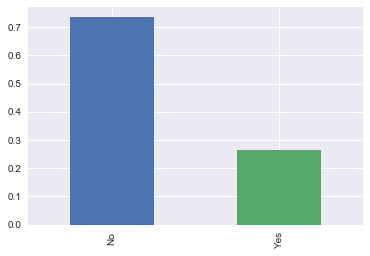

In [132]:
telco_data['Churn'].value_counts(normalize=True).plot.bar()
#Not churn rate =73% and churn rate=27%

In [133]:
#Convert Churn column to binary column
target_col=telco_data['Churn']
telco_data['Churn'].replace(to_replace='Yes',value=1,inplace=True)
telco_data['Churn'].replace(to_replace='No',value=0,inplace=True)


Analyse distribution of numeric independent variables:i.e tenure,MonthlyCharges,TotalCharges

Observations:<br/>
No outliers in tenure,MonthlyCharges,TotalCharges.
They are not normally distributed

[]

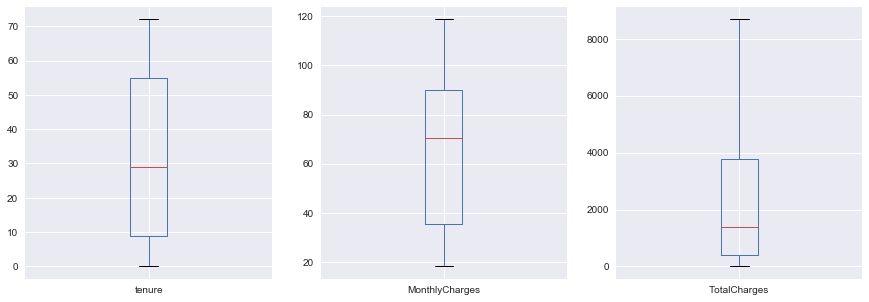

In [134]:
#boxplots
numeric_ds.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()


 Analyse distribution of numeric independent variables against Churn. <br/>
 Observations:<br/>
 1.Customers with longer tenure(60 - 72 months) seems to be more satisfied customers.<br/>
 2.Customers with high monthly charges($70-$100) are more likely to churn and low monthly charges of $20 prefer not to churn.
 <br/>3.Customers with high total charges are least likely to churn .This feature seems to be positively correalted with tenure.<br/>
 4.Tenure can be cut into bins and we can derive a new feature tenure_band.

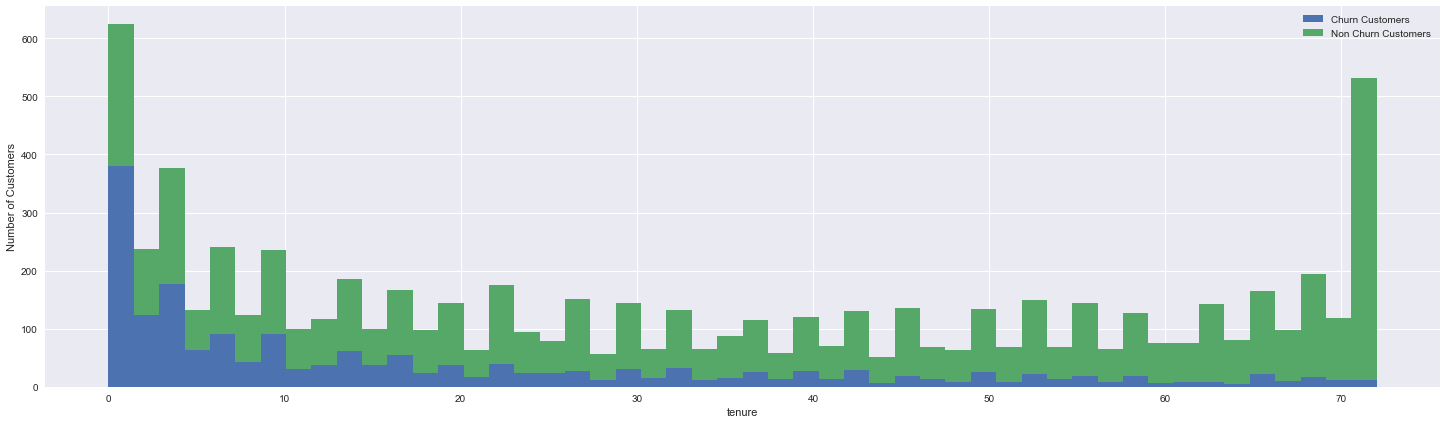

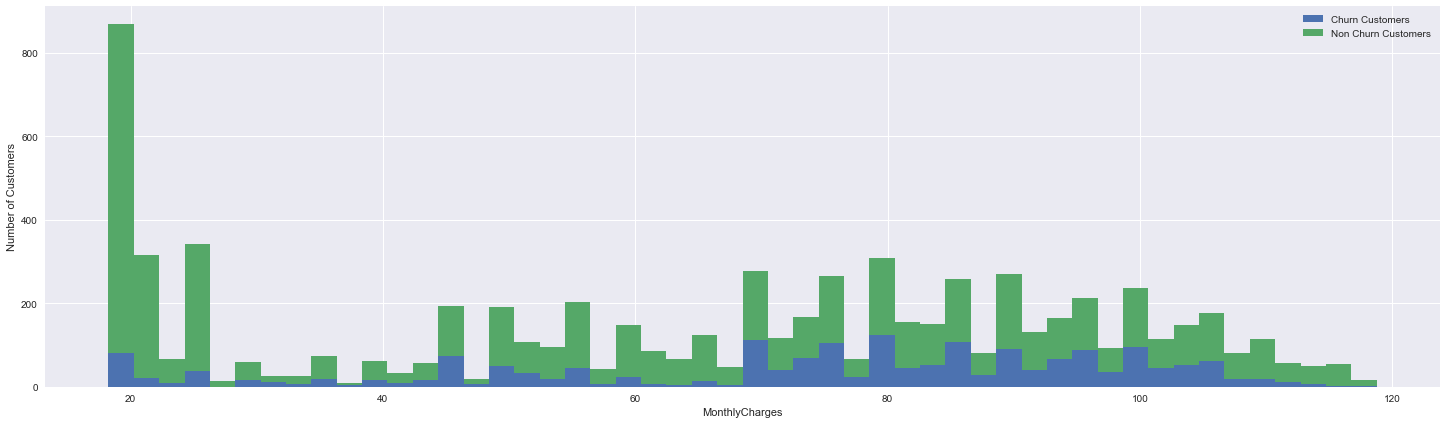

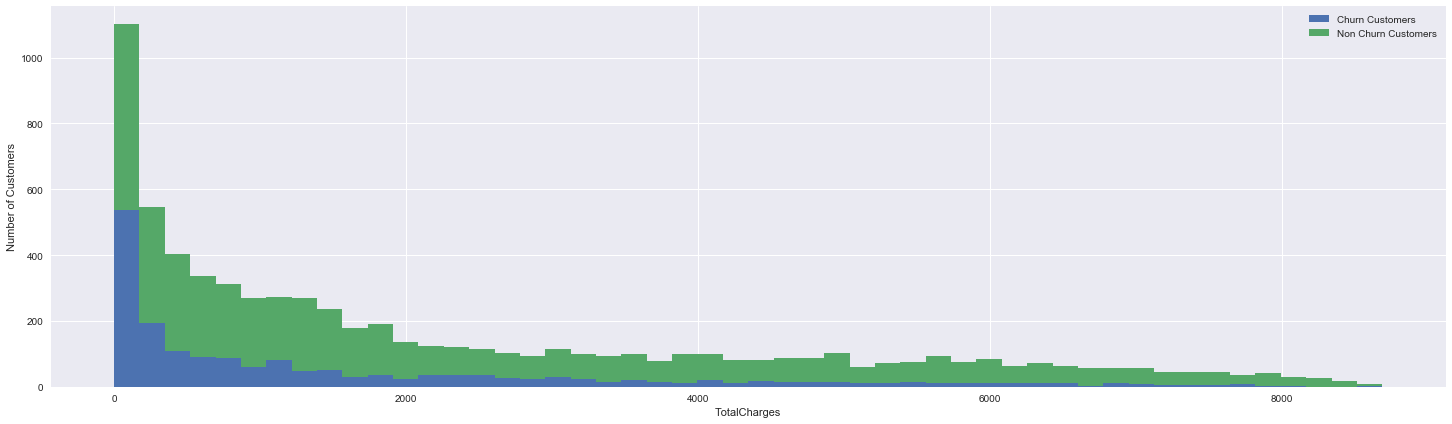

In [135]:
#Histogram plots
for col in numeric_ds.keys().tolist():
    figure = plt.figure(figsize=(25, 7))
    plt.hist([telco_data[telco_data['Churn'] == 1][col], telco_data[telco_data['Churn'] == 0][col]], 
         stacked=True,
         bins = 50, label = ['Churn Customers','Non Churn Customers'])
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.legend();

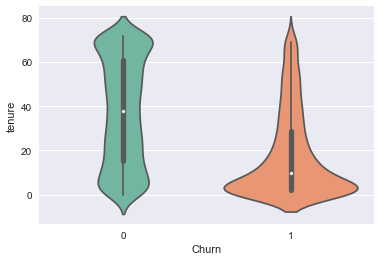

In [136]:
#To decide the bins for tenure am going to use voilin plot.
sns.violinplot(x="Churn",y="tenure" , data=telco_data, split=True, size=6, palette="Set2");
#We will divide tenure into 3 bins:-0-20,20-60,60-80.

For interactions in numeric features, we can look at a correlation matrix.

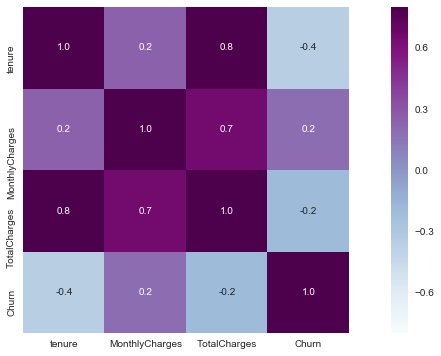

In [137]:
corr = telco_data.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, vmax=.8, square=True, cmap="BuPu",annot=True,fmt=".1f");

Observations: <br/>
Tenure and churn are negatively correlated.Tenure and totalcharges are positively correlated.Totalcharges and monthly charges are positively correlated.This heatmap doesnt show much correlation between churn and monthly charges.

Next we will analyse the distribution of categorical variables against churn


In [138]:
#Separating churn and non churn customers for visualisation
#telco_data['non_churn']  = 1-telco_data['Churn']
objects_ds=objects_ds.drop(['Churn'],axis=1)


Observations:

1.Gender doesnt seem to have much impact on customer behavior as churn rate is equal among male and female.<br/>
2.SeniorCitizens are less likely to churn.But the number of senior customers are very less compared to young customers.<br/>
3.Customers with partners are less likely to terminate subscription.<br/>
4.Customers with dependents have less churn ratio.The dependents could be children and so we can assume that customers with<br/>   partners and dependents spend more time with family at home using the services.<br/>
5.PhoneService and MultipleLines doesnt seem to have much impact on churn<br/>
6.InternetService-FibreOptic type have more churn ratio<br/>
7.Customers without OnlineSecurity,OnlineBackup,DeviceProtection and TechSupport are more likely to churn<br/>
8.Streamingmovies and streamingTv doesnt seem to have much impact on churn<br/>
9.Customers under month-to-month contract and electronic payment method are more prone to leave.


In [139]:
for col in objects_ds.keys().tolist():
    print(telco_data[[col, 'Churn']].groupby([col], as_index=False).mean().sort_values(by='Churn', ascending=False))

   gender     Churn
0  Female  0.269209
1    Male  0.261603
  SeniorCitizen     Churn
1             1  0.416813
0             0  0.236062
  Partner     Churn
0      No  0.329580
1     Yes  0.196649
  Dependents     Churn
0         No  0.312791
1        Yes  0.154502
  PhoneService     Churn
1          Yes  0.267096
0           No  0.249267
      MultipleLines     Churn
2               Yes  0.286099
0                No  0.250442
1  No phone service  0.249267
  InternetService     Churn
1     Fiber optic  0.418928
0             DSL  0.189591
2              No  0.074050
        OnlineSecurity     Churn
0                   No  0.417667
2                  Yes  0.146112
1  No internet service  0.074050
          OnlineBackup     Churn
0                   No  0.399288
2                  Yes  0.215315
1  No internet service  0.074050
      DeviceProtection     Churn
0                   No  0.391276
2                  Yes  0.225021
1  No internet service  0.074050
           TechSupport     Chu

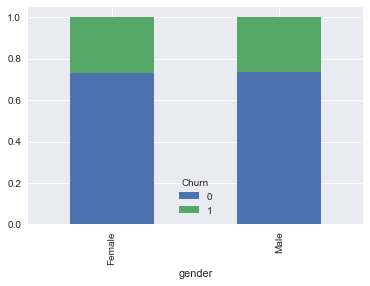

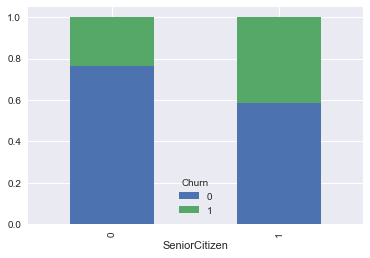

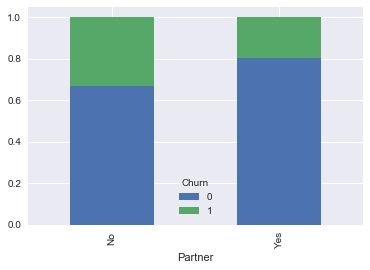

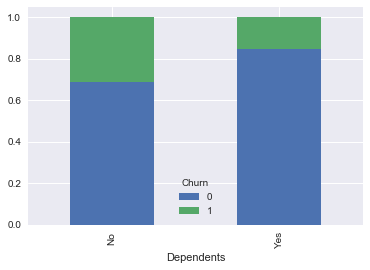

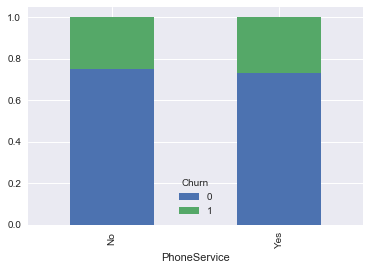

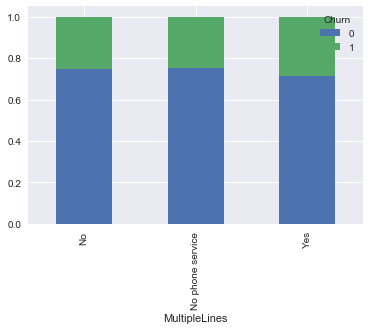

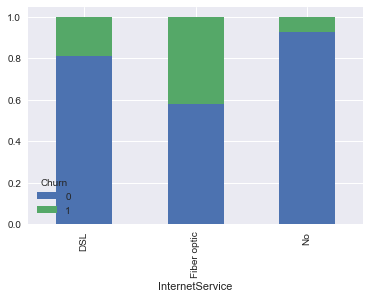

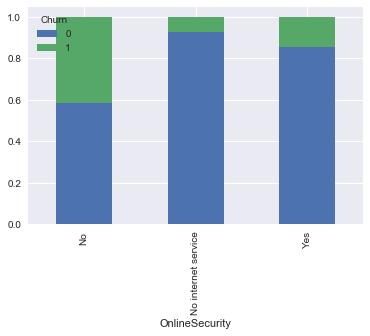

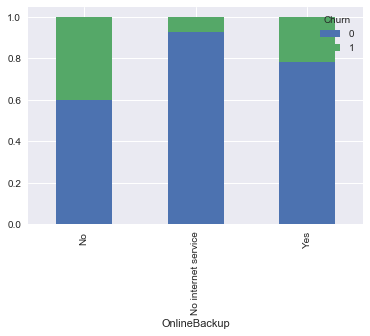

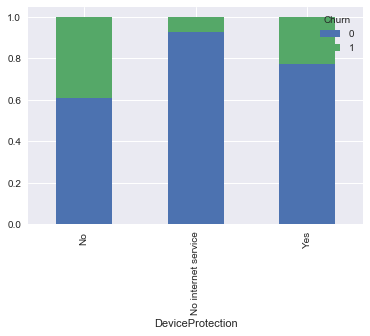

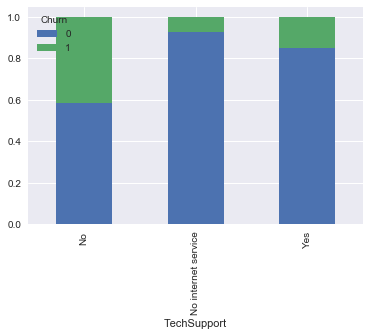

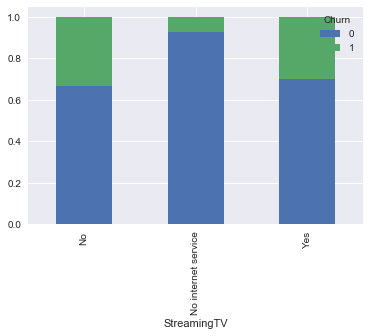

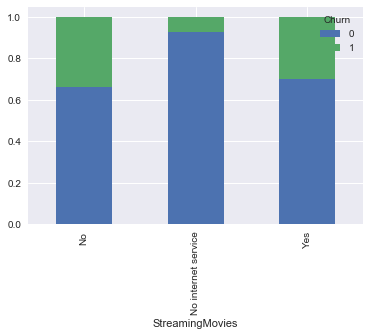

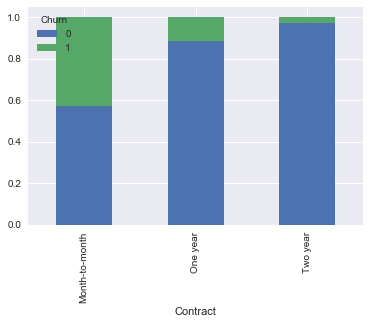

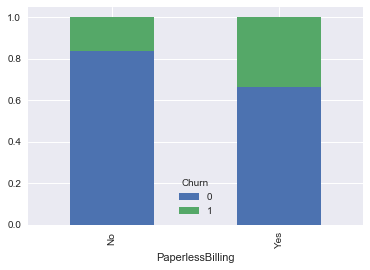

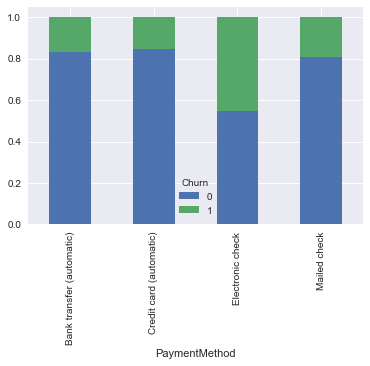

In [140]:
#Visualising using stacked barplots
for col in objects_ds.keys().tolist():
    table=pd.crosstab(telco_data[col],telco_data.Churn)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
    
    #telco_data.groupby(col).agg('sum')[['Churn','non_churn']].plot(kind='bar', figsize=(25, 7),
                                                          #stacked=True, color=['r', 'g']);

Feature Engineering

In this step we are going to:
<br/>Clean categorical features if any duplicate values
<br/>Scaling numerical features
<br/>Creating derived features
<br/>Dropping unimportant features
<br/>Creating dummy variables

In [141]:
#We will replace 'no phone service' and 'no internet service' as 'No' in the dataframe.
telco_data.replace('No phone service','No', inplace=True)
telco_data.replace('No internet service','No', inplace=True)


In [142]:
#Create new featue tenure_band 
telco_data['tenure_band']=pd.cut(numeric_ds["tenure"], bins=[0,10,20,60,80], labels=['new(0-10)','low(10-20)','medium(20-60)','high(60-80)'])
telco_data[['tenure_band', 'Churn']].groupby(['tenure_band'], as_index=False).mean().sort_values(by='tenure_band', ascending=True)

,tenure_band,Churn
0,new(0-10),0.494130
1,low(10-20),0.311674
2,medium(20-60),0.190355
3,high(60-80),0.066098


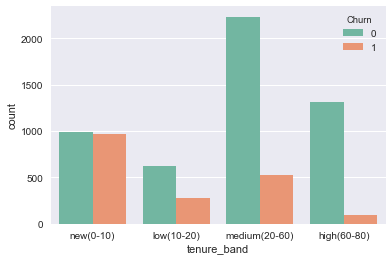

In [143]:
sns.countplot(x=telco_data['tenure_band'], hue=telco_data['Churn'], data=numeric_ds, palette="Set2");

In [144]:
#Convert Categorical into dummy variables
objects_ds=pd.concat([objects_ds, telco_data['tenure_band']], axis=1)
bin_cols   = telco_data.nunique()[telco_data.nunique() == 2].keys().tolist()
multi_cols  =[i for i in objects_ds.keys().tolist() if i not in bin_cols]


In [145]:
#Let's convert all the categorical variables into dummy variables
#LabelEncoder converts binarycolumn values to 0 & 1
le = LabelEncoder()
for i in bin_cols :
    telco_data[i] = le.fit_transform(telco_data[i])
    
#Creates dummy variables for multicategorical columns
telco_data = pd.get_dummies(data = telco_data,columns = multi_cols)

In [146]:
#We can drop the features which seems to have least impact on customer behavior
telco_data.drop(['gender','StreamingTV','StreamingMovies'],axis=1,inplace=True)

Next we are going to scale the continous features.Scaling is done to standardize values so that variables with a bigger unit don’t drown out smaller ones. 

In [147]:
#Scaling numerical features
std = StandardScaler()
num_cols=numeric_ds.keys().tolist()
scaled = std.fit_transform(telco_data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [148]:
#Drop numeric columns and append scaled columns
telco_befScale = telco_data.copy()
telco_data = telco_data.drop(columns = num_cols,axis = 1)
telco_data = telco_data.merge(scaled,left_index=True,right_index=True,how = "left")

Model Training and Model Selection

In [149]:
# Split our dataframe into a training (75%) and test (25%) set.
predictors = telco_data.drop(["Churn"], axis=1).columns
telco_train, telco_test = train_test_split(telco_data, test_size=0.25,random_state=111)

Next we will do Kfold crossvalidation method on different models and will select best model to train and make predictions.

In [150]:
logreg = LogisticRegression()
dtree=DecisionTreeClassifier()
rf = RandomForestClassifier()
KNN=KNeighborsClassifier()
svm=SVC(kernel='linear')

models = [logreg, dtree, rf,KNN,svm]

for model in models:
    print('Cross validation of:{0}'.format(model.__class__))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results =np.mean(model_selection.cross_val_score(model, telco_train[predictors], telco_train['Churn'], cv=kfold, scoring='accuracy'))
    print(" %f" % (cv_results))
    

Cross validation of:<class 'sklearn.linear_model.logistic.LogisticRegression'>
 0.802914
Cross validation of:<class 'sklearn.tree.tree.DecisionTreeClassifier'>
 0.724151
Cross validation of:<class 'sklearn.ensemble.forest.RandomForestClassifier'>
 0.777354
Cross validation of:<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
 0.766947
Cross validation of:<class 'sklearn.svm.classes.SVC'>
 0.791745


We will consider LogisticRegression,SVM and RandomForest for training as they are top 3 scorers in accuracy.
Our evaluation metrics would be accuracy,ROC plot and AUC.


In [151]:
def train(model,X_train,Y_train,X_Test,Y_Test): 
    model.fit(X_train, Y_train)
    #predicting binary outputs
    predictions = model.predict(X_Test)
    eval_metrics(model,Y_Test, predictions)

def eval_metrics(model,Y_Test, predictions):   
    #Accuracy score
    print('Accuracy_score')
    print('-'*40)
    print(accuracy_score(Y_Test, predictions))
    #Confusion matrix 
    print('\n Confusion_matrix')
    print('-'*40)
    print(confusion_matrix(Y_Test, predictions))
    #Classification Report
    print('\n Classification Report')
    print('-'*40)
    print(classification_report(Y_Test, predictions))
    #roc_auc_score
    model_roc_auc = roc_auc_score(Y_Test,predictions) 
    print ('\n Area under curve')
    print('-'*40)
    print(model_roc_auc)
    plot_roc_curve(model_roc_auc,model,Y_Test)


We could compute the actual probabilities of a customer churning rather than just yes/no.
We could use the probabilities as a threshold for driving business decisions around which customers we need to target for retention, and how strong an incentive we need to offer them.  

In [152]:
def calc_probs(model):
    predict_probs = model.predict_proba(telco_test[predictors])
    probs_churn=predict_probs[:,1]
    return probs_churn

def plot_roc_curve(model_roc_auc,model,Y_Test):
    fpr, tpr, thresholds = roc_curve(Y_Test, calc_probs(model))
    plt.figure()
    plt.plot(fpr, tpr, label=' (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('ROC')
    plt.show()

Accuracy_score
----------------------------------------
0.809199318569

 Confusion_matrix
----------------------------------------
[[1181  146]
 [ 190  244]]

 Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1327
          1       0.63      0.56      0.59       434

avg / total       0.80      0.81      0.81      1761


 Area under curve
----------------------------------------
0.726094687091


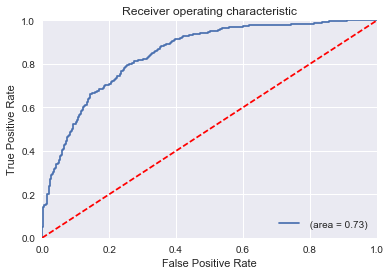

In [153]:
#1.Logistic Regression
clf_lr=LogisticRegression()
train(clf_lr,telco_train[predictors], telco_train['Churn'],telco_test[predictors],telco_test['Churn'])

Results show that logistic regression have a good overall prediction.We can find the most important features by looking at the
model coefficients.

In [154]:
# coefs = pd.DataFrame(clf.coef_.ravel())
# df_imp = pd.DataFrame(coefs)
# df_imp.columns=["importance"]
# df_imp["labels"] = predictors
# df_imp.sort_values("importance", inplace=True, ascending=False)
# print(df_imp)
coefs = pd.Series(clf_lr.coef_[0],
                 index=telco_train[predictors].columns.values)
coefs.sort_values(inplace=True, ascending=False)
print(coefs)

MonthlyCharges                             0.756590
Contract_Month-to-month                    0.532956
TotalCharges                               0.492358
tenure_band_new(0-10)                      0.474072
PaperlessBilling                           0.349886
PaymentMethod_Electronic check             0.123277
SeniorCitizen                              0.118942
MultipleLines                              0.109988
Partner                                    0.031942
InternetService_Fiber optic                0.020628
tenure_band_medium(20-60)                 -0.080137
Contract_One year                         -0.087471
PaymentMethod_Bank transfer (automatic)   -0.128966
tenure_band_low(10-20)                    -0.152756
DeviceProtection                          -0.168785
tenure_band_high(60-80)                   -0.171685
Dependents                                -0.208593
PaymentMethod_Credit card (automatic)     -0.208752
InternetService_DSL                       -0.210000
PaymentMetho

The coeffient table shows the most important features to predict if the client will leave or not.Features with higher positive coeffients 
strongly indicate the chance of leaving and the lower negative coefficients indicate higher chance of staying.
These coefficients support some of our assumptions we made in EDA.
Tenure,Contract,MonthlyCharges,TotalCharges remain to be the strongest predictors.
New Feature tenure_band_new(0-10) which indicates latest customers(0-10 months) also seems to be a good feature.

Accuracy_score
----------------------------------------
0.806927881885

 Confusion_matrix
----------------------------------------
[[1196  131]
 [ 209  225]]

 Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.90      0.88      1327
          1       0.63      0.52      0.57       434

avg / total       0.80      0.81      0.80      1761


 Area under curve
----------------------------------------
0.709857132439


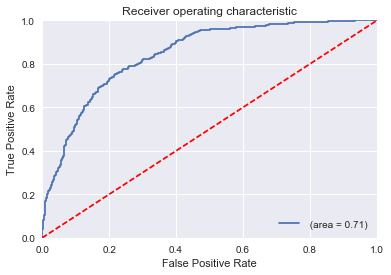

In [155]:
#2.RandomForest
clf_rf=RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
train(clf_rf,telco_train[predictors], telco_train['Churn'],telco_test[predictors],telco_test['Churn'])

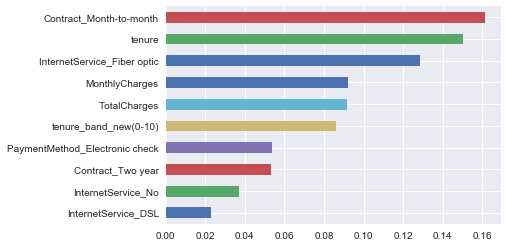

In [156]:
#Feature importances
importances = clf_rf.feature_importances_
features = pd.Series(importances,
                 index=telco_train[predictors].columns.values)
features.sort_values()[-10:].plot(kind = 'barh')

Observations:
Results and important features of random forest are very similar to that of logistic regression.

Accuracy_score
----------------------------------------
0.800113571834

 Confusion_matrix
----------------------------------------
[[1210  117]
 [ 235  199]]

 Classification Report
----------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1327
          1       0.63      0.46      0.53       434

avg / total       0.79      0.80      0.79      1761


 Area under curve
----------------------------------------
0.685178271907


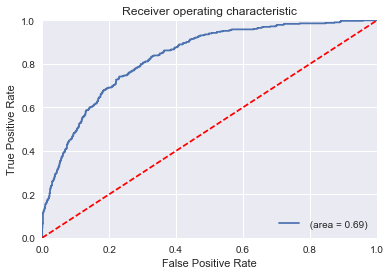

In [157]:
#Support Vector Machines
clf_svm = SVC(kernel='linear',probability=True) 
train(clf_svm,telco_train[predictors], telco_train['Churn'],telco_test[predictors],telco_test['Churn'])

Logistic Regression seems to be the best model .
<br/>Now we have the probabilities for each customer which indicate the chance of them stay or leave.
<br/>We will select a threshold of 80% to group the risky customers who are most likely to churn and focus on them by offering <br/>discounts or customized plans.

In [158]:
lr_pred_churn = calc_probs(clf_lr)#probabilties for churning customers 
telco_test["prob_churn"]=lr_pred_churn
df_risky = telco_test[telco_test["prob_churn"] > 0.80]
print(df_risky.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1285 to 1976
Data columns (total 29 columns):
SeniorCitizen                              36 non-null int64
Partner                                    36 non-null int64
Dependents                                 36 non-null int64
PhoneService                               36 non-null int64
MultipleLines                              36 non-null int64
OnlineSecurity                             36 non-null int64
OnlineBackup                               36 non-null int64
DeviceProtection                           36 non-null int64
TechSupport                                36 non-null int64
PaperlessBilling                           36 non-null int64
Churn                                      36 non-null int64
InternetService_DSL                        36 non-null uint8
InternetService_Fiber optic                36 non-null uint8
InternetService_No                         36 non-null uint8
Contract_Month-to-month               

Conclusion

Expolratory Data Analysis was used to form assumptions regarding the features which have high impact on customers' churn behaviour.Logistic regression model helped us to predict if a client will leave or not and showed us which are the most important features.

Customers can be segmented based on predicted probabilities and customer worth into groups ,so that company can focus on each group by introducing different plans and discounts. This will help to leverage the business as well as the customer satisfaction.
